# Task 2
5390<br>
Elaina Rohlfing


Ran into issues with initial dataset choice (political_memes, training was stuck at baseline). So I used bears dataset instead, but unfortunately I ran short on time. Completed all questions, but did not have time to finetune model for 100% accuracy.

## A custom callback

In [ ]:
import tensorflow as tf

In [ ]:
import time
class speed_accuracy_callback(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.start_time = time.time()

    def on_train_end(self, logs=None):
        self.total_time = time.time() - self.start_time
        print('Total training time for {} epochs: {} seconds'.format(self.params['epochs'], self.total_time))
        print('Validation accuracy after {} epochs: {}'.format(self.params['epochs'], logs['val_accuracy']))
        print('Finished training')



# Task 2

## Block I: Load the data
* Upload & unzip the dataset
* Load training and validation images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! unzip "/content/drive/MyDrive/Colab Notebooks/bears_ws.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/bears_ws.zip
   creating: bears/
  inflating: bears/.DS_Store         
  inflating: __MACOSX/bears/._.DS_Store  
   creating: bears/test/
   creating: bears/training/
   creating: bears/validation/
   creating: bears/test/polar/
  inflating: bears/test/.DS_Store    
  inflating: __MACOSX/bears/test/._.DS_Store  
   creating: bears/test/panda/
   creating: bears/test/grizzly/
   creating: bears/training/polar/
  inflating: bears/training/.DS_Store  
  inflating: __MACOSX/bears/training/._.DS_Store  
   creating: bears/training/panda/
   creating: bears/training/grizzly/
   creating: bears/validation/polar/
  inflating: bears/validation/.DS_Store  
  inflating: __MACOSX/bears/validation/._.DS_Store  
   creating: bears/validation/panda/
   creating: bears/validation/grizzly/
  inflating: bears/test/polar/polar_1198.jpg  
  inflating: bears/test/polar/polar_1167.jpg  
  inflating: bears/test/polar/polar_1359.jpg  
  inflating: bears/test/po

In [ ]:
! mv "/content/drive/MyDrive/Colab Notebooks/bears" "/content/bears"
! ls -l

mv: cannot stat '/content/drive/MyDrive/Colab Notebooks/bears': No such file or directory
total 16
drwxr-xr-x 5 root root 4096 Dec 15  2022 bears
drwx------ 6 root root 4096 Apr 23 06:12 drive
drwxr-xr-x 3 root root 4096 Apr 23 06:13 __MACOSX
drwxr-xr-x 1 root root 4096 Apr 19 13:30 sample_data


In [ ]:
#! ls -l "/content/Political Meme Dataset/"

total 12
drwxr-xr-x 4 root root 4096 Dec 15  2022 test
drwxr-xr-x 4 root root 4096 Dec 15  2022 training
drwxr-xr-x 4 root root 4096 Dec 15  2022 validation


In [ ]:
#! mkdir /content/Political\ Meme\ Dataset/temp
#! mkdir /content/Political\ Meme\ Dataset/temp/a
#! mkdir /content/Political\ Meme\ Dataset/temp/b
#! cp /content/Political\ Meme\ Dataset/test/test_conservative/VTbm9TS.jpg /content/Political\ Meme\ Dataset/temp/a/
#! cp /content/Political\ Meme\ Dataset/test/test_liberal/271970219_10159999234069558_6868533478441192134_n.jpg /content/Political\ Meme\ Dataset/temp/b/

mkdir: cannot create directory ‘/content/Political Meme Dataset/temp’: File exists
mkdir: cannot create directory ‘/content/Political Meme Dataset/temp/a’: File exists
mkdir: cannot create directory ‘/content/Political Meme Dataset/temp/b’: File exists


In [ ]:
#!ls -l "/content/Political Meme Dataset/validation"

total 16
drwxr-xr-x 2 root root  4096 Dec 15  2022 valid_conservative
drwxr-xr-x 2 root root 12288 Dec 15  2022 valid_liberal


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale all images by 1./255
my_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
def prepare_images(image_size=(256, 256), batch=32):
    # Generator for training dataset
    train = my_generator.flow_from_directory( "/content/bears/training", target_size=image_size, shuffle=True, batch_size=batch)

    # Generator for validation dataset
    val = my_generator.flow_from_directory( "/content/bears/validation", target_size=image_size, shuffle=True, batch_size=batch)

    # We may need to create another generator for the test dataset
    #test = my_generator.flow_from_directory( "/content/Political Meme Dataset/test", target_size=image_size, batch_size=4, class_mode='categorical')
    return train, val#,test

In [ ]:
train, val = prepare_images(batch=16)

Found 718 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


In [ ]:
train.class_indices

{'grizzly': 0, 'panda': 1, 'polar': 2}

Display one image and its label

In [ ]:
import matplotlib.pyplot as plt
# Take one batch full of images
def display_image(dataset):
    images, labels = dataset[0]
    print(images.shape)
    #print(labels)
    plt.imshow(images[1])
    plt.title(str(labels[1]))
    plt.axis("off")

(16, 256, 256, 3)
(16, 256, 256, 3)


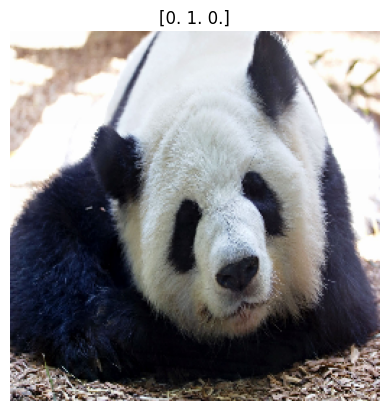

In [ ]:
# MAKE SURE OUTPUT IS CORRECT FOR ALL SETS!!!!
display_image(train)
display_image(val)
#display_image(test_ds)

## Build a model

In [ ]:
from tensorflow.keras import datasets, layers, models
num_filters = [16, 8, 4]
filter_shape = (3, 3)
print(f'{train.image_shape=}')
inputshape = train.image_shape
pad = 'same'
pool = (4, 4)


# convolutional base
model = models.Sequential()
model.add(layers.Conv2D(num_filters[0], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape, name="first_layer_conv"))
model.add(layers.MaxPooling2D(pool_size=pool, padding=pad, name="first_layer_pool"))

model.add(layers.Conv2D(num_filters[1], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))
model.add(layers.MaxPooling2D(pool_size=pool, padding=pad))

model.add(layers.Conv2D(num_filters[2], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))

# add dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

train.image_shape=(256, 256, 3)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer_conv (Conv2D)   (None, 256, 256, 16)      448       
                                                                 
 first_layer_pool (MaxPooli  (None, 64, 64, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 8)         1160      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 4)         292       
                                                                 
 flatten (Flatten)           (None, 1024)              0

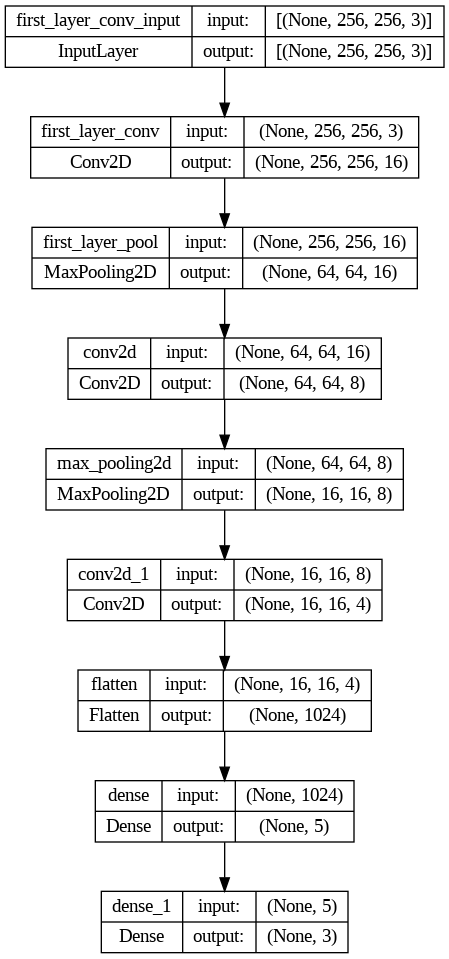

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_layer_names=True, show_shapes=True)

## Block H: Inspect the model
Inspect the number of paramaters, number of layers, input shape, and number of output classes using the two approaches below:

In [ ]:
model1 = build_conv2d_model(num_layers=3, num_filters=[64, 32, 8])
add_dense_model(model1, num_neurons=8, num_classes=train_ds.num_classes, last_activate='softmax')

model1.summary()

num_neurons=[8]
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 first_layer_conv (MaxPooli  (None, 128, 128, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 128, 128, 32)      18464     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 64, 64, 8)         2312      
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 3

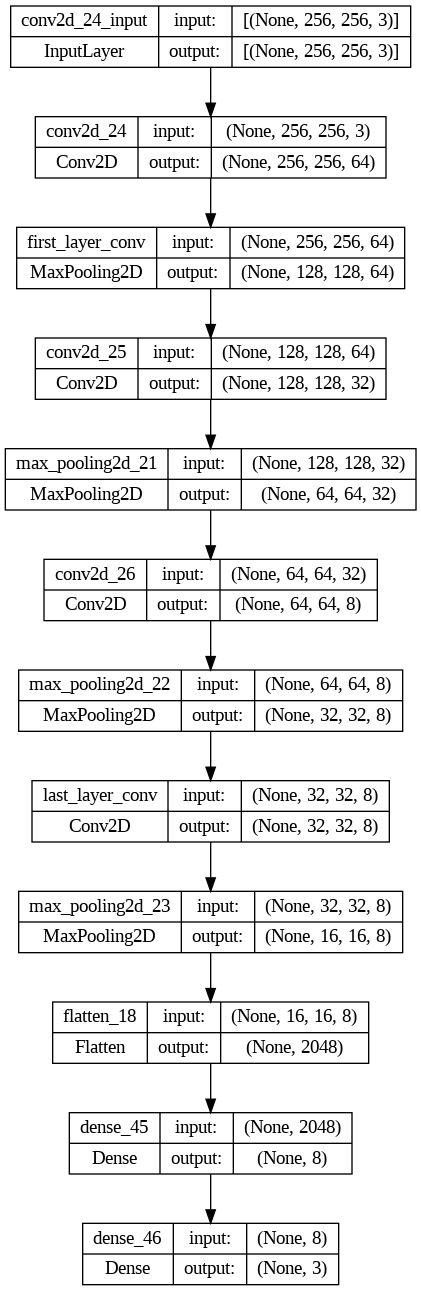

In [ ]:
tf.keras.utils.plot_model(model1, show_layer_names=True, show_shapes=True)

## Block B: Compile the model to check for errors

## & Block A: Train the model

In [ ]:
def compile_and_fit(model, train, val, num_epochs=10, loud=0):
    '''
    train should be a generator object
    val should be a generator object
    '''
    history = []
    speed = []
    training_stats_callback = speed_accuracy_callback()

    model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])
    history = model.fit(train, epochs=num_epochs, validation_data=val, batch_size=32, callbacks=training_stats_callback, verbose=loud)
    speed = training_stats_callback.total_time

    return model, history, speed

In [ ]:
model1, history, speed = compile_and_fit(model1, train_ds, valid_ds, loud=1)

Epoch 1/10
45/45 [==============================] - 11s 109ms/step - loss: 0.6471 - accuracy: 0.3203 - val_loss: 0.6476 - val_accuracy: 0.3083
Epoch 2/10
45/45 [==============================] - 3s 74ms/step - loss: 0.6379 - accuracy: 0.3134 - val_loss: 0.6380 - val_accuracy: 0.3083
Epoch 3/10
45/45 [==============================] - 3s 71ms/step - loss: 0.5786 - accuracy: 0.4721 - val_loss: 0.5428 - val_accuracy: 0.5292
Epoch 4/10
45/45 [==============================] - 3s 70ms/step - loss: 0.4662 - accuracy: 0.6560 - val_loss: 0.4539 - val_accuracy: 0.5917
Epoch 5/10
45/45 [==============================] - 3s 72ms/step - loss: 0.4396 - accuracy: 0.6630 - val_loss: 0.4312 - val_accuracy: 0.6375
Epoch 6/10
45/45 [==============================] - 3s 75ms/step - loss: 0.4018 - accuracy: 0.6880 - val_loss: 0.4169 - val_accuracy: 0.7375
Epoch 7/10
45/45 [==============================] - 3s 74ms/step - loss: 0.3787 - accuracy: 0.7479 - val_loss: 0.3641 - val_accuracy: 0.7500
Epoch 8/10


## Block F: Investigate learning curves
Look back and investigate the training by comparing the accuracy on the training dataset and validation dataset

In [ ]:
import matplotlib.pyplot as plt
def plot_history(hist, title):
    fig, axs = plt.subplots(2, 1, figsize=(6, 7))
    history_dict = hist.history
    loss_values = history_dict["loss"]
    val_loss = history_dict["val_loss"]
    epochs = range(1, len(loss_values) + 1)

    axs[0].plot(epochs, hist.history['accuracy'], label='Training Accuracy')
    axs[0].plot(epochs, hist.history['val_accuracy'], label='Validation Accuracy')

    axs[0].set_title("Accuracy for " + title)
    axs[0].set_xlabel("Epochs")
    axs[0].set_ylabel("Accuracy")
    axs[0].set_ylim([0, 1])
    axs[0].legend()

    axs[1].plot(epochs, hist.history['loss'], label='Training Loss')
    axs[1].plot(epochs, hist.history['val_loss'], label='Validation Loss')

    axs[1].set_title("Loss for " + title)
    axs[1].set_xlabel("Epochs")
    axs[1].set_ylabel("Loss")
    axs[1].set_ylim([0, 1])
    axs[1].legend()

    plt.tight_layout()
    plt.show()

def plot_multiple_history(histories, title):
    fig, axs = plt.subplots(len(histories), 2, figsize=(10, 10))

    for i, h in enumerate(histories):
        # Plot training and validation accuracy
        axs[i][0].plot(h.history['accuracy'], label='Training Accuracy')
        axs[i][0].plot(h.history['val_accuracy'], label='Validation Accuracy')
        axs[i][0].set_title(f'Accuracy - Model {i+1}')
        axs[i][0].set_xlabel('Epoch')
        axs[i][0].set_ylabel('Accuracy')
        axs[i][0].set_ylim([0, 1])
        axs[i][0].legend()

        # Plot training and validation loss
        axs[i][1].plot(h.history['loss'], label='Training Loss')
        axs[i][1].plot(h.history['val_loss'], label='Validation Loss')
        axs[i][1].set_title(f'Loss - Model {i+1}')
        axs[i][1].set_xlabel('Epoch')
        axs[i][1].set_ylabel('Loss')
        axs[i][1].set_ylim([0, 1])
        axs[i][1].legend()

    plt.tight_layout()
    plt.show()

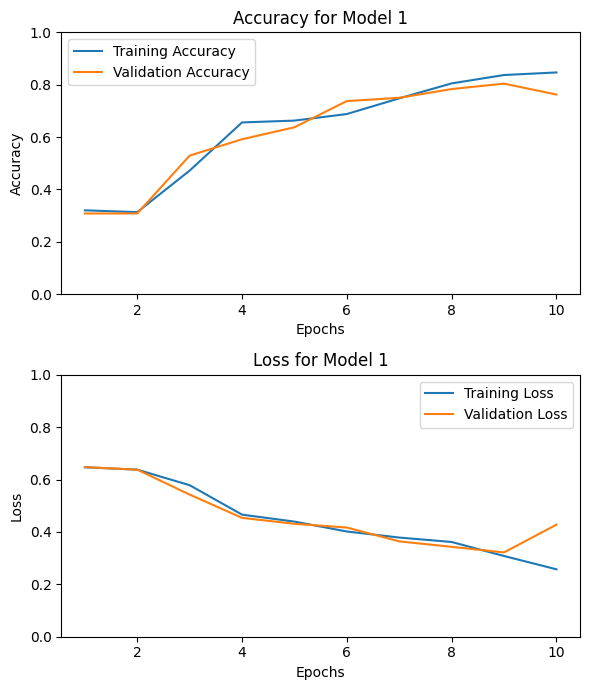

In [ ]:
plot_history(history, "Model 1")

## Block E: Peek into what the model is predicting

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def peek_predictions(model, dataset=valid_ds, num_images=5):
    images, labels = dataset[0]
    for i in range(len(images)):
        print('')
        print('Checking image', i)
        x = images[i]
        plt.figure()
        plt.imshow(x)
        plt.show()
        print('Ground truth:', labels[i])
        x = np.expand_dims(x, axis=0)
        p = model.predict(x, verbose=0)
        print(f'Prediction: {p.argmax()} {p}')
        if i == num_images: break

In [ ]:
valid_ds.class_indices

{'grizzly': 0, 'panda': 1, 'polar': 2}


Checking image 0


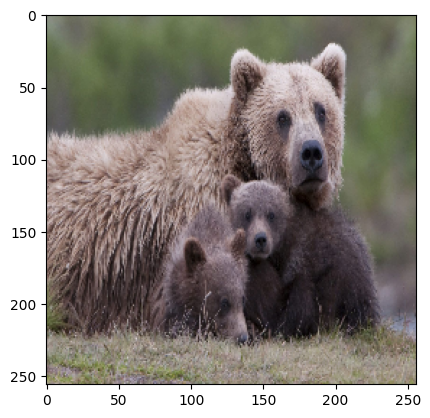

Ground truth: [1. 0. 0.]
Prediction: 1 [[4.5791302e-02 9.5404166e-01 1.6706818e-04]]

Checking image 1


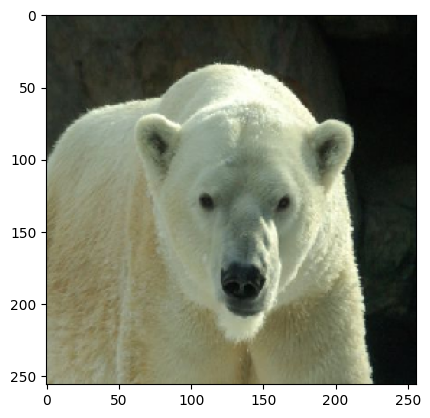

Ground truth: [0. 0. 1.]
Prediction: 2 [[5.477298e-06 3.608358e-02 9.639109e-01]]

Checking image 2


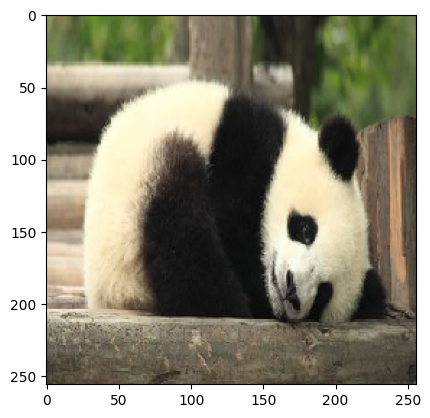

Ground truth: [0. 1. 0.]
Prediction: 1 [[6.5123667e-03 9.9347585e-01 1.1800714e-05]]

Checking image 3


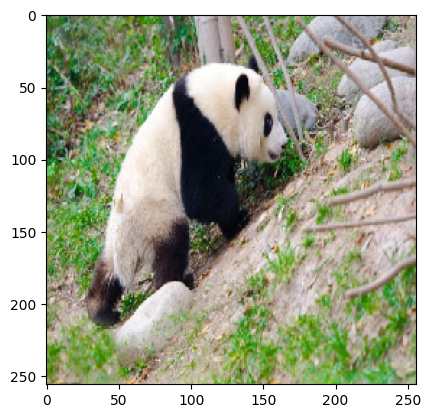

Ground truth: [0. 1. 0.]
Prediction: 1 [[3.1803411e-03 9.9668282e-01 1.3687003e-04]]

Checking image 4


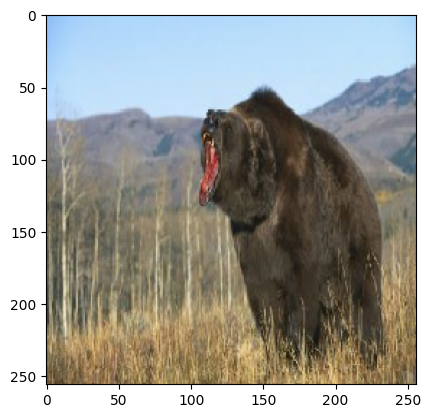

Ground truth: [1. 0. 0.]
Prediction: 1 [[0.10617279 0.82136303 0.07246419]]

Checking image 5


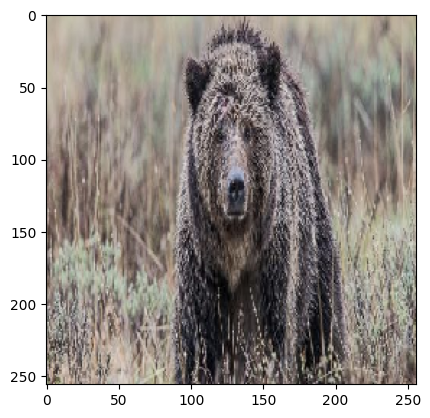

Ground truth: [1. 0. 0.]
Prediction: 0 [[0.73586625 0.26247856 0.00165523]]


In [ ]:
peek_predictions(model1, valid_ds, 5)

## Block G: Evaluate the model on the validation dataset

In [ ]:
valid_loss, valid_acc = model1.evaluate(valid_ds, verbose=2)

15/15 - 1s - loss: 0.4278 - accuracy: 0.7625 - 859ms/epoch - 57ms/step


# Questions

## Q1 Effect of increasing and decreasing epochs (last)

In [ ]:
model1.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 first_layer_conv (MaxPooli  (None, 128, 128, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 128, 128, 32)      18464     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 64, 64, 8)         2312      
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 32, 32, 8)       

num_neurons=[12]

Build and train new model with 2 epochs:
Model: "sequential_207"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_573 (Conv2D)         (None, 256, 256, 64)      1792      
                                                                 
 first_layer_conv (MaxPooli  (None, 128, 128, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_574 (Conv2D)         (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_554 (MaxPool  (None, 64, 64, 64)        0         
 ing2D)                                                          
                                                                 
 conv2d_575 (Conv2D)         (None, 64, 64, 64)        36928     
                                                           

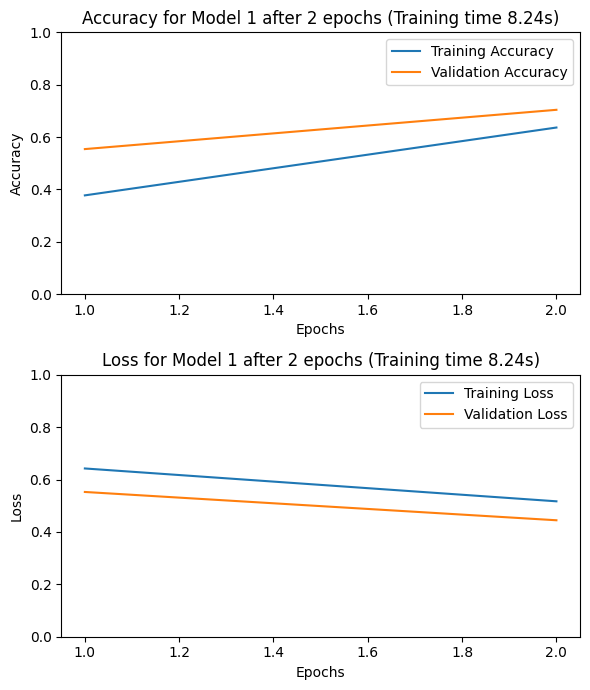

num_neurons=[12]

Build and train new model with 4 epochs:
Model: "sequential_208"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_576 (Conv2D)         (None, 256, 256, 64)      1792      
                                                                 
 first_layer_conv (MaxPooli  (None, 128, 128, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_577 (Conv2D)         (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_557 (MaxPool  (None, 64, 64, 64)        0         
 ing2D)                                                          
                                                                 
 conv2d_578 (Conv2D)         (None, 64, 64, 64)        36928     
                                                           

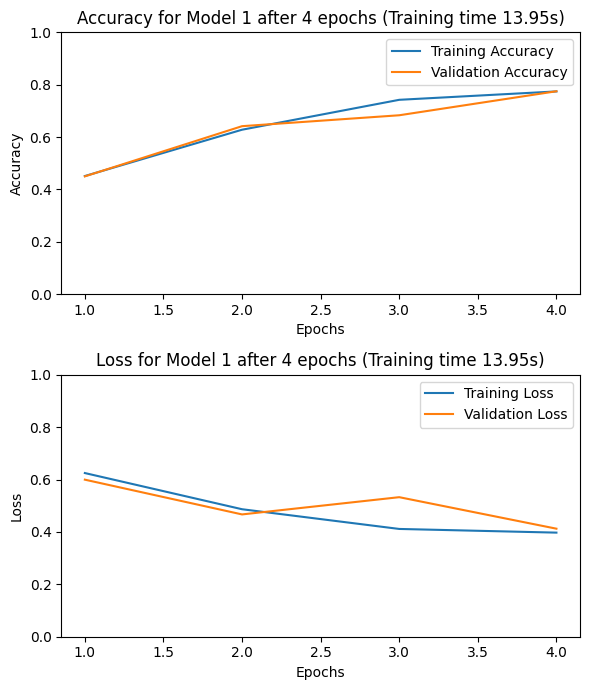

num_neurons=[12]

Build and train new model with 8 epochs:
Model: "sequential_209"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_579 (Conv2D)         (None, 256, 256, 64)      1792      
                                                                 
 first_layer_conv (MaxPooli  (None, 128, 128, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_580 (Conv2D)         (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_560 (MaxPool  (None, 64, 64, 64)        0         
 ing2D)                                                          
                                                                 
 conv2d_581 (Conv2D)         (None, 64, 64, 64)        36928     
                                                           

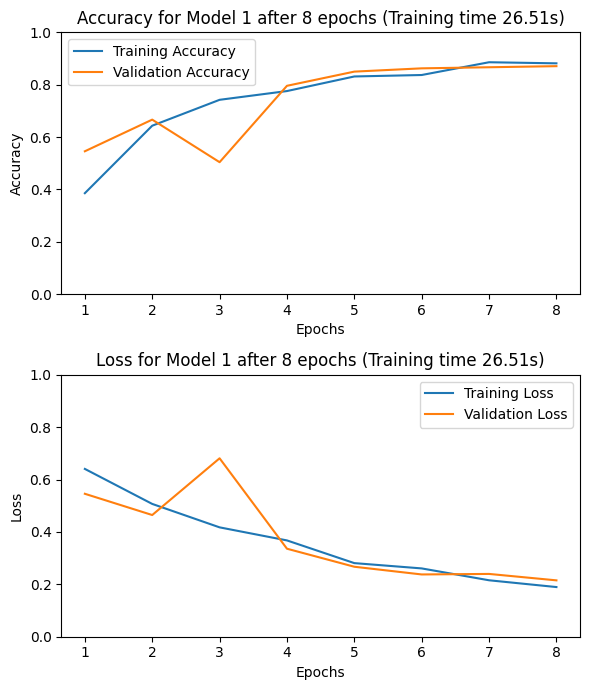

num_neurons=[12]

Build and train new model with 16 epochs:
Model: "sequential_210"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_582 (Conv2D)         (None, 256, 256, 64)      1792      
                                                                 
 first_layer_conv (MaxPooli  (None, 128, 128, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_583 (Conv2D)         (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_563 (MaxPool  (None, 64, 64, 64)        0         
 ing2D)                                                          
                                                                 
 conv2d_584 (Conv2D)         (None, 64, 64, 64)        36928     
                                                          

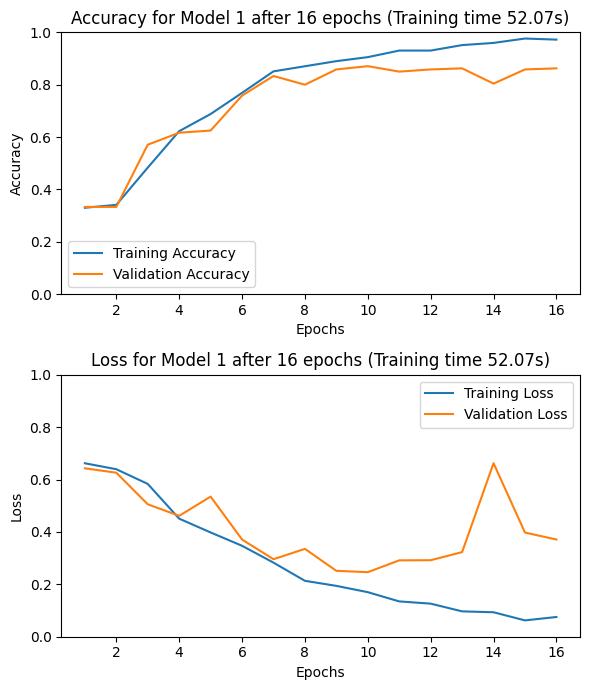

num_neurons=[12]

Build and train new model with 32 epochs:
Model: "sequential_211"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_585 (Conv2D)         (None, 256, 256, 64)      1792      
                                                                 
 first_layer_conv (MaxPooli  (None, 128, 128, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_586 (Conv2D)         (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_566 (MaxPool  (None, 64, 64, 64)        0         
 ing2D)                                                          
                                                                 
 conv2d_587 (Conv2D)         (None, 64, 64, 64)        36928     
                                                          

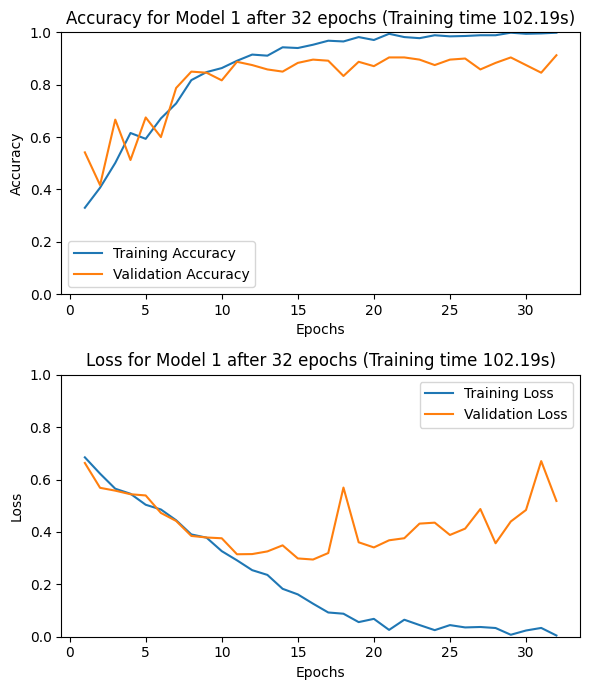

num_neurons=[12]

Build and train new model with 64 epochs:
Model: "sequential_212"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_588 (Conv2D)         (None, 256, 256, 64)      1792      
                                                                 
 first_layer_conv (MaxPooli  (None, 128, 128, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_589 (Conv2D)         (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_569 (MaxPool  (None, 64, 64, 64)        0         
 ing2D)                                                          
                                                                 
 conv2d_590 (Conv2D)         (None, 64, 64, 64)        36928     
                                                          

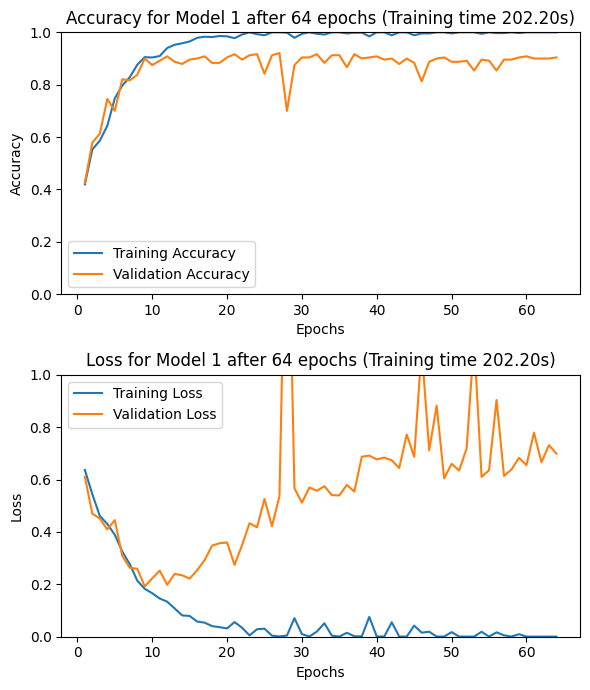

num_neurons=[12]

Build and train new model with 128 epochs:
Model: "sequential_213"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_591 (Conv2D)         (None, 256, 256, 64)      1792      
                                                                 
 first_layer_conv (MaxPooli  (None, 128, 128, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_592 (Conv2D)         (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_572 (MaxPool  (None, 64, 64, 64)        0         
 ing2D)                                                          
                                                                 
 conv2d_593 (Conv2D)         (None, 64, 64, 64)        36928     
                                                         

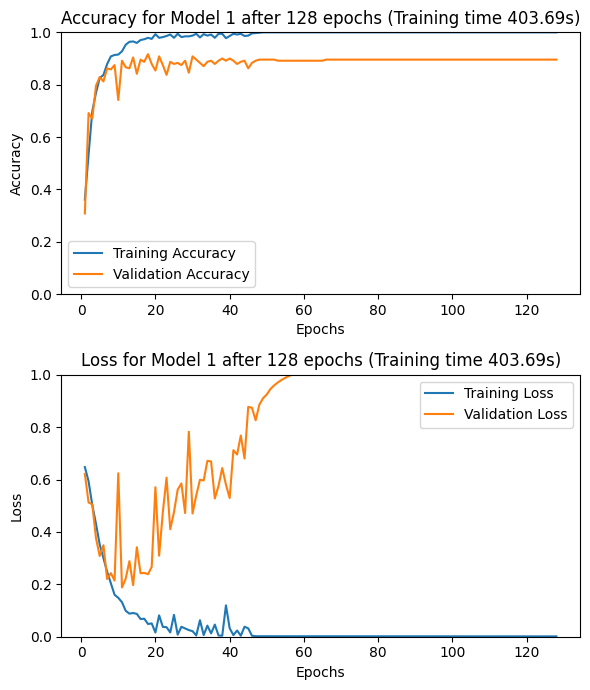

In [ ]:
for i in range(1, 8):
    model1 = build_conv2d_model(num_layers=4, num_filters=[64,64,64,32], verbose=0)
    add_dense_model(model1, num_layers=2, num_neurons=12, num_classes=train_ds.num_classes, last_activate='softmax')
    print(f"\nBuild and train new model with {2**i} epochs:")
    model1.summary()
    model1, history_e, speed_e = compile_and_fit(model1, train_ds, valid_ds, num_epochs=(2**i), loud=0)
    plot_history(history_e, f"Model 1 after {2**i} epochs (Training time {speed_e:.2f}s)")

In [ ]:
i = 10
speed_l = 32.643684651635168
print(f"Model2 with {i} layers (Training time {speed_l:.2f})")

Model2 with 10 layers (Training time 32.64)


## Q2 Effect of increasing and decreasing layers

Model with 4 layers: validation accuracy .90
Speed similar for all

num_filters=[64]
num_neurons=[32]

Build and train new model with 1 layers:
Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_84 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 first_layer_conv (MaxPooli  (None, 128, 128, 64)      0         
 ng2D)                                                           
                                                                 
 flatten_40 (Flatten)        (None, 1048576)           0         
                                                                 
 dense_88 (Dense)            (None, 32)                33554464  
                                                                 
 dense_89 (Dense)            (None, 3)                 99        
                                                                 
Total params: 33556355 (128.01 MB)
Trainabl

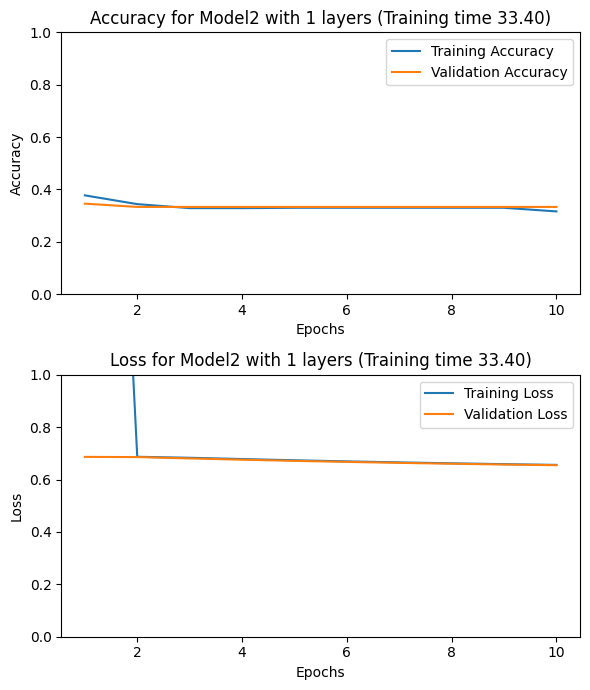




num_filters=[64, 64]
num_neurons=[32]

Build and train new model with 2 layers:
Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_85 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 first_layer_conv (MaxPooli  (None, 128, 128, 64)      0         
 ng2D)                                                           
                                                                 
 last_layer_conv (Conv2D)    (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_67 (MaxPooli  (None, 64, 64, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_41 (Flatten)        (None, 262144)            0         
                                    

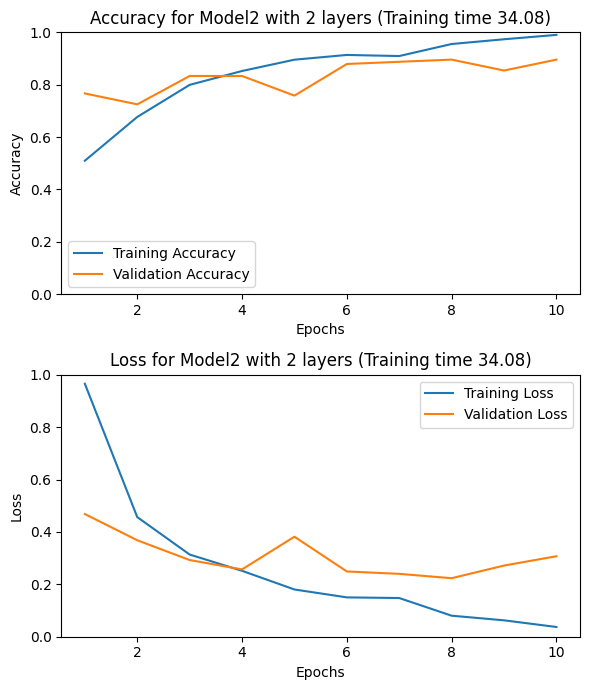




num_filters=[64, 64, 64]
num_neurons=[32]

Build and train new model with 3 layers:
Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_86 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 first_layer_conv (MaxPooli  (None, 128, 128, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_87 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_68 (MaxPooli  (None, 64, 64, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_88 (Conv2D)          (None, 64, 64, 64)        36928     
                                

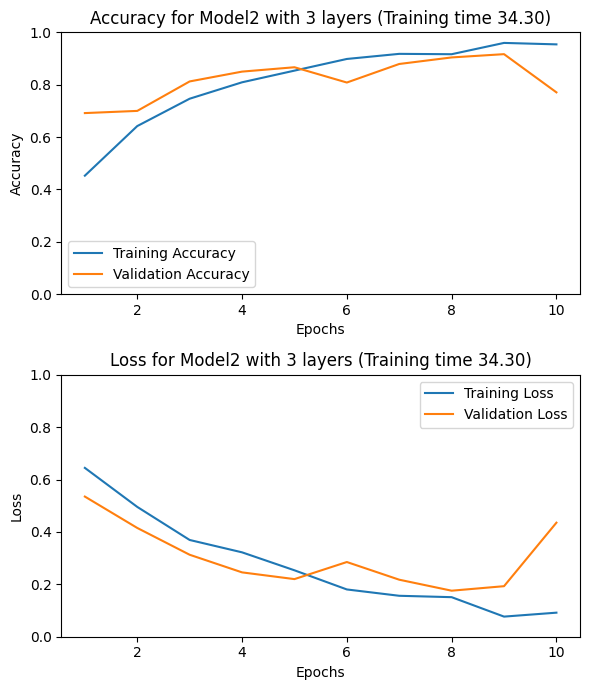




num_filters=[64, 64, 64, 64]
num_neurons=[32]

Build and train new model with 4 layers:
Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_89 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 first_layer_conv (MaxPooli  (None, 128, 128, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_90 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_71 (MaxPooli  (None, 64, 64, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_91 (Conv2D)          (None, 64, 64, 64)        36928     
                            

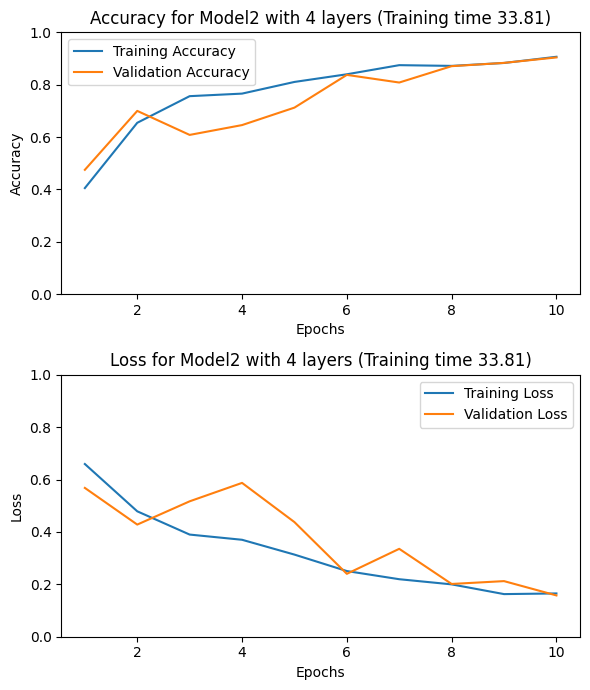




num_filters=[64, 64, 64, 64, 64]
num_neurons=[32]

Build and train new model with 5 layers:
Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_93 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 first_layer_conv (MaxPooli  (None, 128, 128, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_94 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_75 (MaxPooli  (None, 64, 64, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_95 (Conv2D)          (None, 64, 64, 64)        36928     
                        

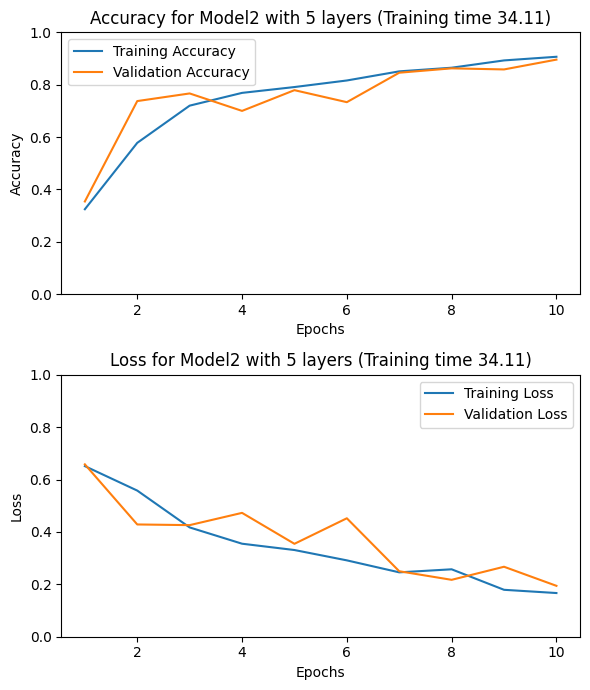




num_filters=[64, 64, 64, 64, 64, 64]
num_neurons=[32]

Build and train new model with 6 layers:
Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_98 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 first_layer_conv (MaxPooli  (None, 128, 128, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_99 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_80 (MaxPooli  (None, 64, 64, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_100 (Conv2D)         (None, 64, 64, 64)        36928     
                    

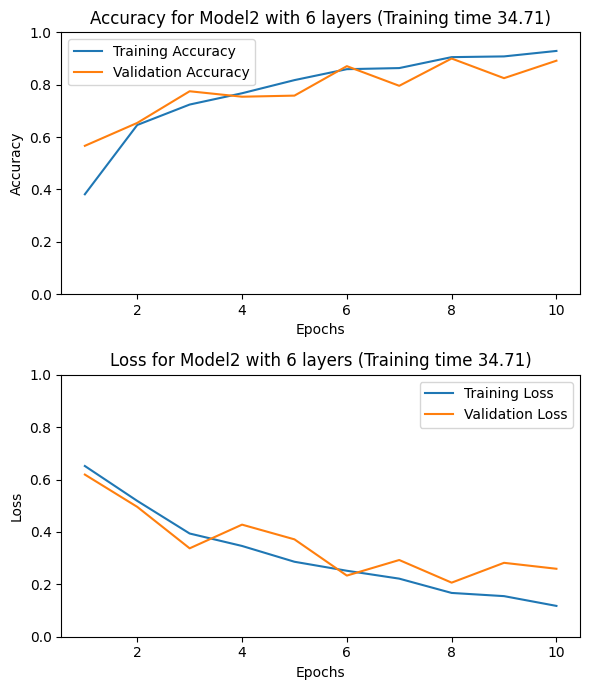




num_filters=[64, 64, 64, 64, 64, 64, 64]
num_neurons=[32]

Build and train new model with 7 layers:
Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_104 (Conv2D)         (None, 256, 256, 64)      1792      
                                                                 
 first_layer_conv (MaxPooli  (None, 128, 128, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_105 (Conv2D)         (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_86 (MaxPooli  (None, 64, 64, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_106 (Conv2D)         (None, 64, 64, 64)        36928     
                

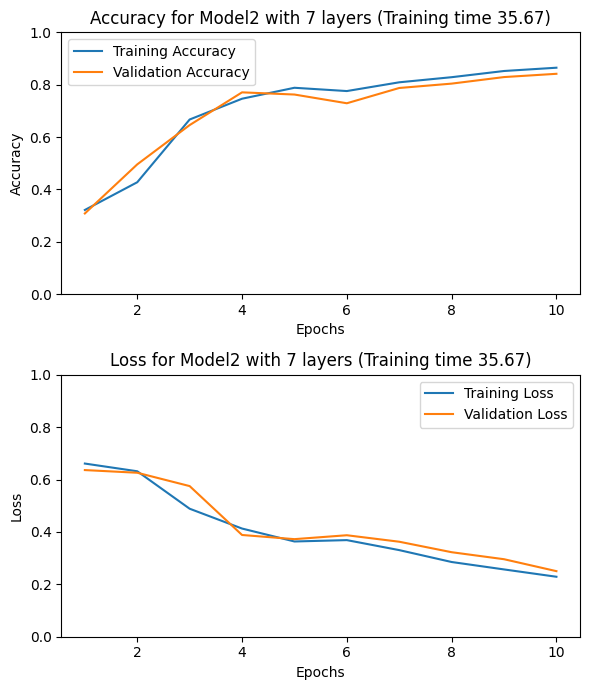




num_filters=[64, 64, 64, 64, 64, 64, 64, 64]
num_neurons=[32]

Build and train new model with 8 layers:
Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_111 (Conv2D)         (None, 256, 256, 64)      1792      
                                                                 
 first_layer_conv (MaxPooli  (None, 128, 128, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_112 (Conv2D)         (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_93 (MaxPooli  (None, 64, 64, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_113 (Conv2D)         (None, 64, 64, 64)        36928     
            

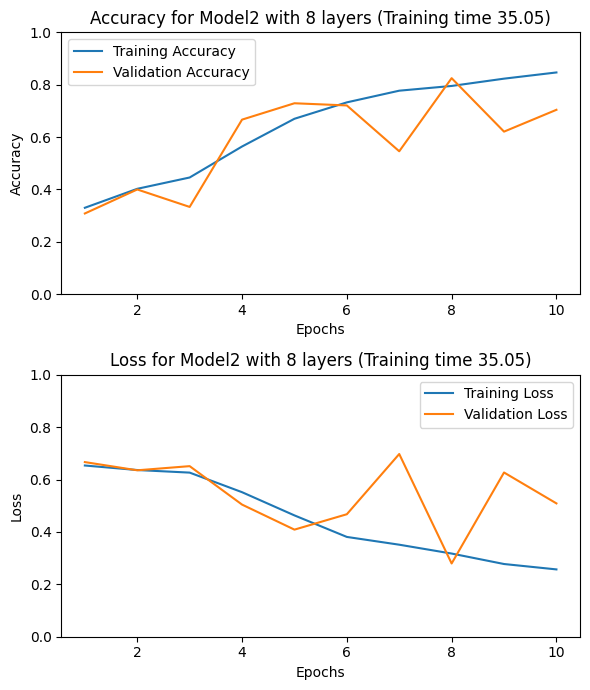

In [ ]:
for i in range(1, 9):
    model2 = build_conv2d_model(num_layers=i, num_filters=64, verbose=0)
    add_dense_model(model2, num_layers=2, num_classes=train_ds.num_classes, last_activate='softmax')
    print(f"\nBuild and train new model with {i} layers:")
    model2.summary()
    model2, history_l, speed_l = compile_and_fit(model=model2, train=train_ds, val=valid_ds, loud=0)
    plot_history(history_l, f"Model2 with {i} layers (Training time {speed_l:.2f})")
    print("\n\n")

num_filters=[64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
num_neurons=[32]

Build and train new model with 10 layers:
Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_74 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 first_layer_conv (MaxPooli  (None, 128, 128, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_75 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_57 (MaxPooli  (None, 64, 64, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_76 (Conv2D)          (None, 64, 64, 64)        36928     
      

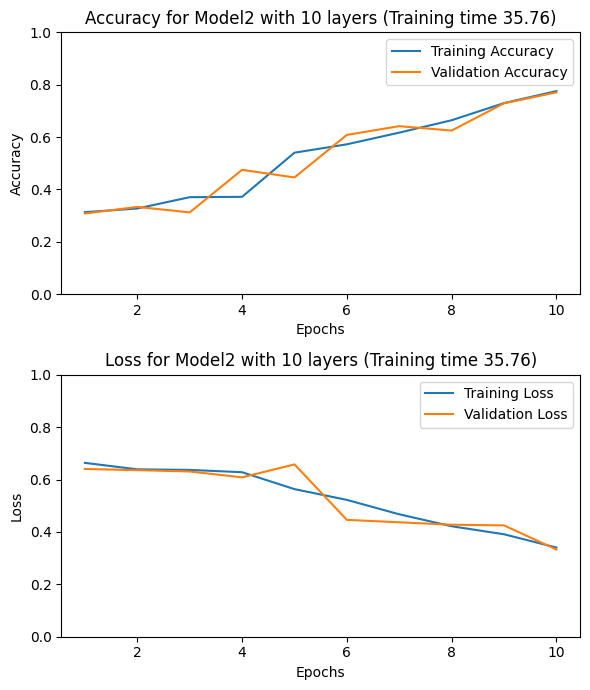

In [ ]:
# 10 layers (run first to check for errors)
model2 = build_conv2d_model(num_layers=10, num_filters=64, verbose=0)
add_dense_model(model2, num_layers=2, num_classes=train_ds.num_classes, last_activate='softmax')
print(f"\nBuild and train new model with {10} layers:")
model2.summary()
model2, history_l, speed_l = compile_and_fit(model=model2, train=train_ds, val=valid_ds, loud=0)
plot_history(history_l, f"Model2 with {10} layers (Training time {speed_l:.2f})")
print("\n\n")

## Q3 Effect of increasing and decreasing filters

num_filters=[2, 2, 2, 2]
num_neurons=[10]

Build and train new model with 2 filters:
Model: "sequential_136"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_381 (Conv2D)         (None, 256, 256, 2)       56        
                                                                 
 first_layer_conv (MaxPooli  (None, 128, 128, 2)       0         
 ng2D)                                                           
                                                                 
 conv2d_382 (Conv2D)         (None, 128, 128, 2)       38        
                                                                 
 max_pooling2d_362 (MaxPool  (None, 64, 64, 2)         0         
 ing2D)                                                          
                                                                 
 conv2d_383 (Conv2D)         (None, 64, 64, 2)         38        
                                 

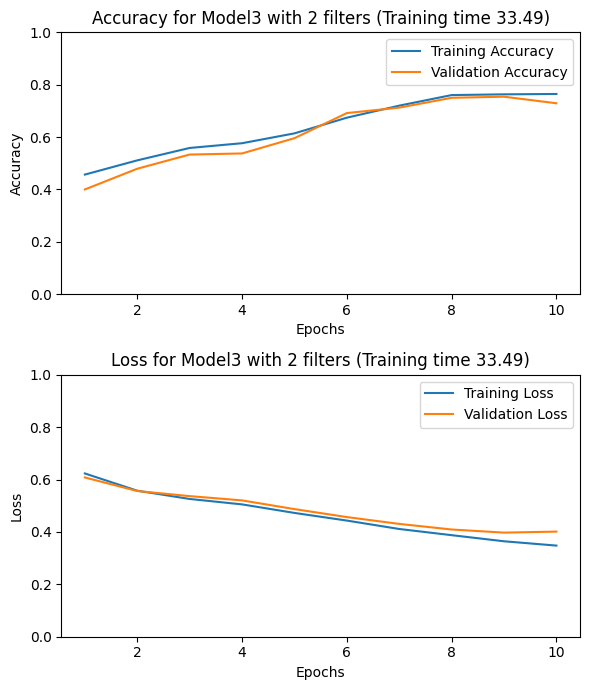




num_filters=[4, 4, 4, 4]
num_neurons=[10]

Build and train new model with 4 filters:
Model: "sequential_137"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_384 (Conv2D)         (None, 256, 256, 4)       112       
                                                                 
 first_layer_conv (MaxPooli  (None, 128, 128, 4)       0         
 ng2D)                                                           
                                                                 
 conv2d_385 (Conv2D)         (None, 128, 128, 4)       148       
                                                                 
 max_pooling2d_365 (MaxPool  (None, 64, 64, 4)         0         
 ing2D)                                                          
                                                                 
 conv2d_386 (Conv2D)         (None, 64, 64, 4)         148       
                              

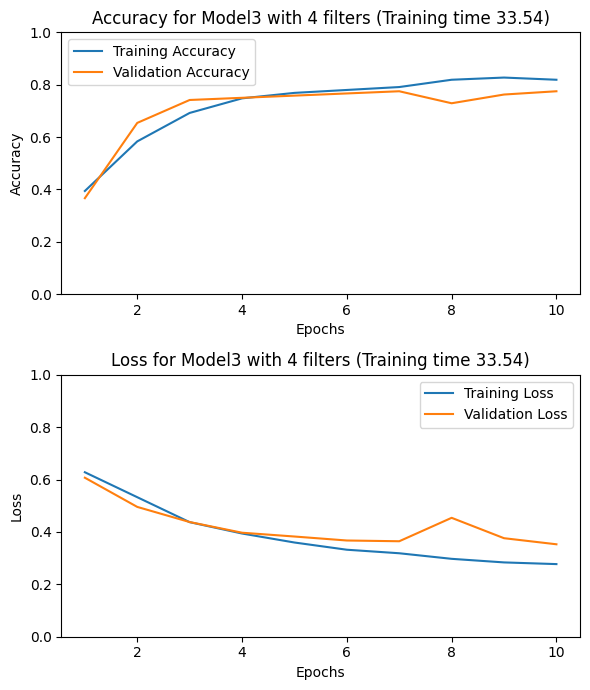




num_filters=[8, 8, 8, 8]
num_neurons=[10]

Build and train new model with 8 filters:
Model: "sequential_138"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_387 (Conv2D)         (None, 256, 256, 8)       224       
                                                                 
 first_layer_conv (MaxPooli  (None, 128, 128, 8)       0         
 ng2D)                                                           
                                                                 
 conv2d_388 (Conv2D)         (None, 128, 128, 8)       584       
                                                                 
 max_pooling2d_368 (MaxPool  (None, 64, 64, 8)         0         
 ing2D)                                                          
                                                                 
 conv2d_389 (Conv2D)         (None, 64, 64, 8)         584       
                              

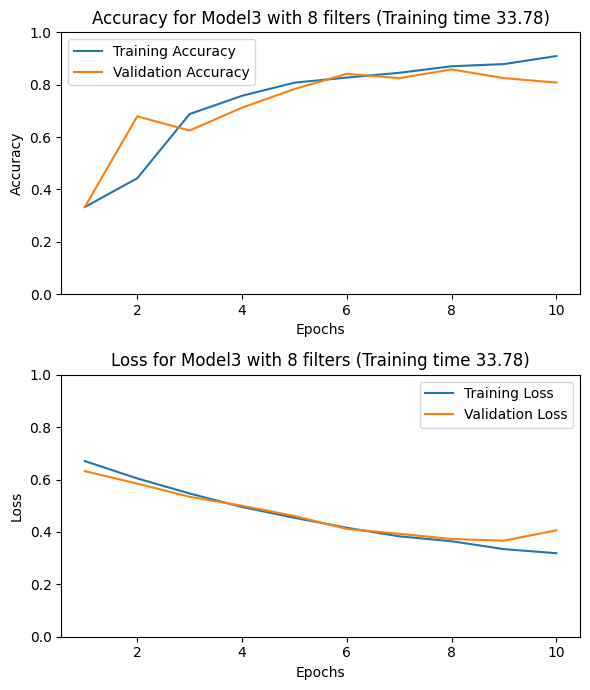




num_filters=[16, 16, 16, 16]
num_neurons=[10]

Build and train new model with 16 filters:
Model: "sequential_139"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_390 (Conv2D)         (None, 256, 256, 16)      448       
                                                                 
 first_layer_conv (MaxPooli  (None, 128, 128, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_391 (Conv2D)         (None, 128, 128, 16)      2320      
                                                                 
 max_pooling2d_371 (MaxPool  (None, 64, 64, 16)        0         
 ing2D)                                                          
                                                                 
 conv2d_392 (Conv2D)         (None, 64, 64, 16)        2320      
                         

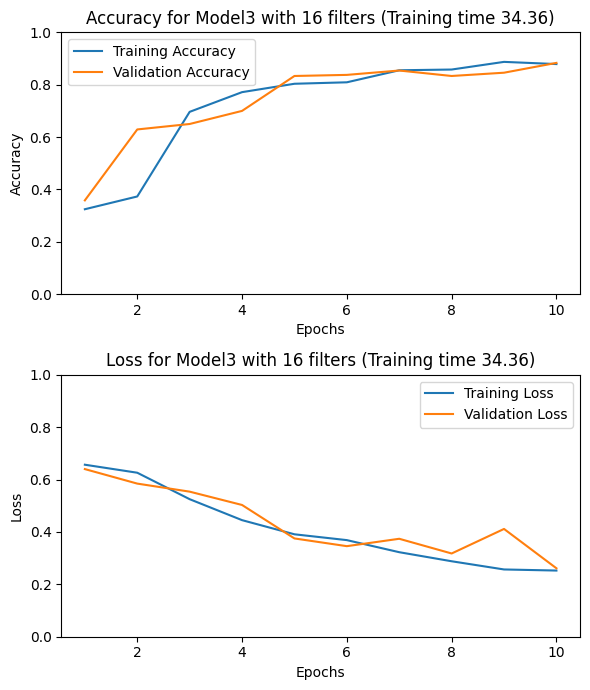




num_filters=[32, 32, 32, 32]
num_neurons=[10]

Build and train new model with 32 filters:
Model: "sequential_140"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_393 (Conv2D)         (None, 256, 256, 32)      896       
                                                                 
 first_layer_conv (MaxPooli  (None, 128, 128, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_394 (Conv2D)         (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_374 (MaxPool  (None, 64, 64, 32)        0         
 ing2D)                                                          
                                                                 
 conv2d_395 (Conv2D)         (None, 64, 64, 32)        9248      
                         

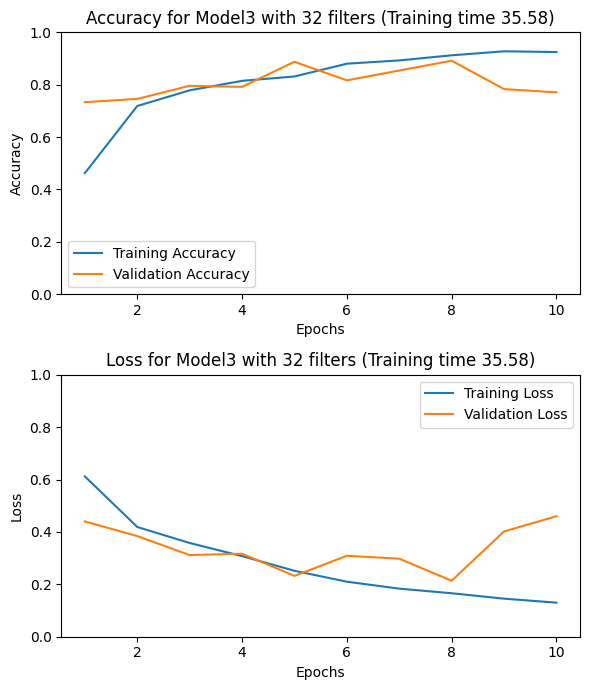




num_filters=[64, 64, 64, 64]
num_neurons=[10]

Build and train new model with 64 filters:
Model: "sequential_141"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_396 (Conv2D)         (None, 256, 256, 64)      1792      
                                                                 
 first_layer_conv (MaxPooli  (None, 128, 128, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_397 (Conv2D)         (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_377 (MaxPool  (None, 64, 64, 64)        0         
 ing2D)                                                          
                                                                 
 conv2d_398 (Conv2D)         (None, 64, 64, 64)        36928     
                         

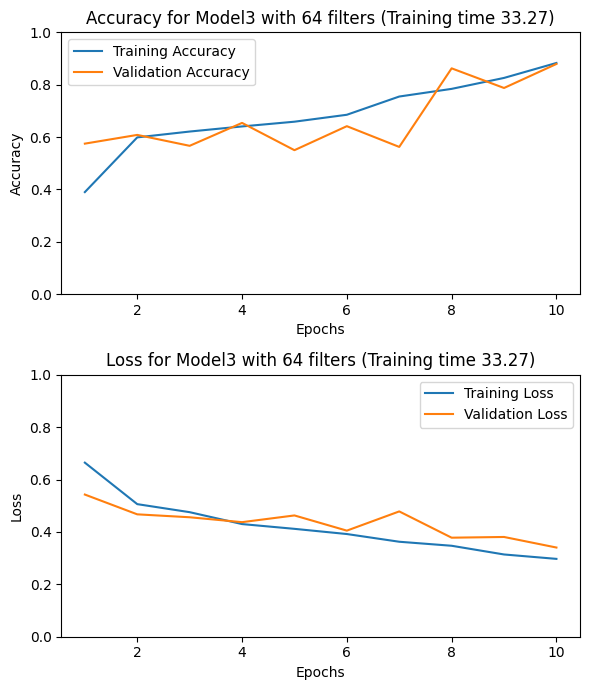




num_filters=[128, 128, 128, 128]
num_neurons=[10]

Build and train new model with 128 filters:
Model: "sequential_142"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_399 (Conv2D)         (None, 256, 256, 128)     3584      
                                                                 
 first_layer_conv (MaxPooli  (None, 128, 128, 128)     0         
 ng2D)                                                           
                                                                 
 conv2d_400 (Conv2D)         (None, 128, 128, 128)     147584    
                                                                 
 max_pooling2d_380 (MaxPool  (None, 64, 64, 128)       0         
 ing2D)                                                          
                                                                 
 conv2d_401 (Conv2D)         (None, 64, 64, 128)       147584    
                    

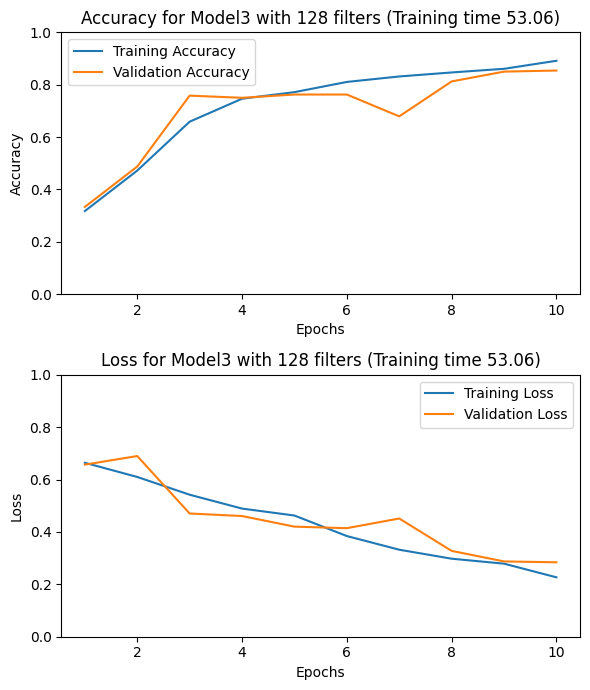

In [ ]:
for i in range(1, 8):
    model3 = build_conv2d_model(num_layers=4, num_filters=2**i, verbose=0)
    add_dense_model(model3, num_layers=2, num_neurons=10, num_classes=train_ds.num_classes, last_activate='softmax')
    print(f"\nBuild and train new model with {2**i} filters:")
    model3.summary()
    model3, history_l, speed_l = compile_and_fit(model=model3, train=train_ds, val=valid_ds, loud=0)
    plot_history(history_l, f"Model3 with {2**i} filters (Training time {speed_l:.2f})")
    print("\n\n")

## Q4 Effect of increasing and decreasing the image size
Highest accuracy on Model with 32x32 images <br>
Longest training on Model with 256x256<br>
Imagine longer training would provide more insight on accuracy comparision.

In [ ]:
train_small, val_small = prepare_images(image_size=(32,32))
train_med,  val_med  = prepare_images(image_size=(64,64))
train_large, val_large = prepare_images(image_size=(256,256))

Found 718 images belonging to 3 classes.
Found 240 images belonging to 3 classes.
Found 718 images belonging to 3 classes.
Found 240 images belonging to 3 classes.
Found 718 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


num_neurons=[12]
Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_165 (Conv2D)         (None, 32, 32, 64)        1792      
                                                                 
 first_layer_conv (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_166 (Conv2D)         (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_146 (MaxPool  (None, 8, 8, 64)          0         
 ing2D)                                                          
                                                                 
 conv2d_167 (Conv2D)         (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_147 (MaxPool  (None, 

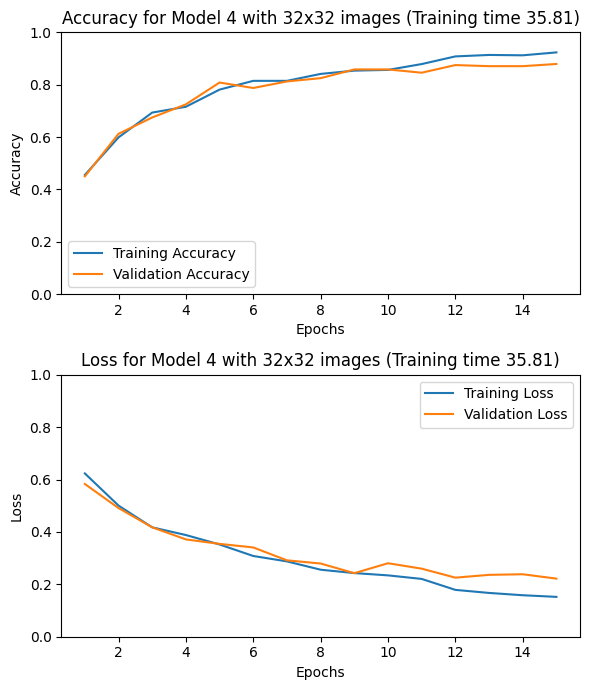

In [ ]:
# smallest images
train_size = train_small
val_size = val_small
shape = 32
model4 = build_conv2d_model(num_layers=4, num_filters=[64, 64, 64, 16], inputshape=(shape, shape, 3))
add_dense_model(model4, num_layers=2, num_neurons=12, num_classes=train_size.num_classes, last_activate='softmax')
model4.summary()
model4, history_s, speed_s = compile_and_fit(model4, train_size, val_size, num_epochs=15, loud=0)
plot_history(history_s, f"Model 4 with {shape}x{shape} images (Training time {speed_s:.2f})")

num_neurons=[12]
Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_168 (Conv2D)         (None, 64, 64, 64)        1792      
                                                                 
 first_layer_conv (MaxPooli  (None, 32, 32, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_169 (Conv2D)         (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_149 (MaxPool  (None, 16, 16, 64)        0         
 ing2D)                                                          
                                                                 
 conv2d_170 (Conv2D)         (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_150 (MaxPool  (None, 

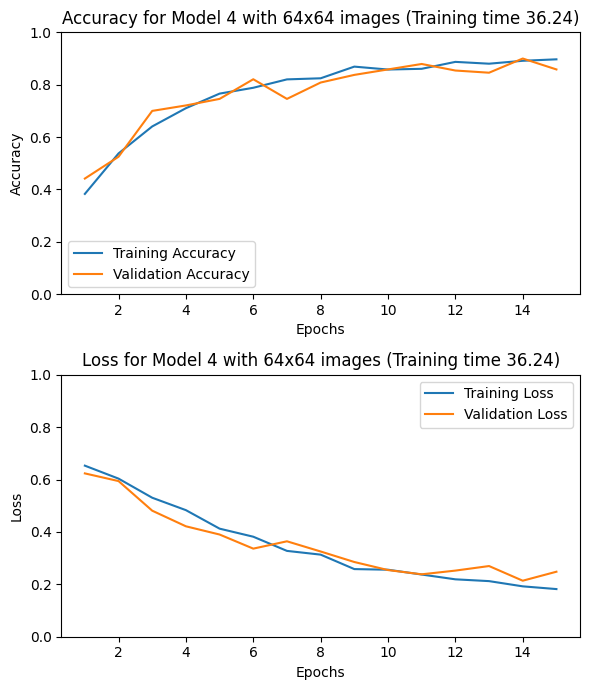

In [ ]:
# medium images
train_size = train_med
val_size = val_med
shape = 64
model4 = build_conv2d_model(num_layers=4, num_filters=[64, 64, 64, 16], inputshape=(shape, shape, 3))
add_dense_model(model4, num_layers=2, num_neurons=12, num_classes=train_size.num_classes, last_activate='softmax')
model4.summary()
model4, history_s, speed_s = compile_and_fit(model4, train_size, val_size, num_epochs=15, loud=0)
plot_history(history_s, f"Model 4 with {shape}x{shape} images (Training time {speed_s:.2f})")

num_neurons=[12]
Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_162 (Conv2D)         (None, 256, 256, 64)      1792      
                                                                 
 first_layer_conv (MaxPooli  (None, 128, 128, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_163 (Conv2D)         (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_143 (MaxPool  (None, 64, 64, 64)        0         
 ing2D)                                                          
                                                                 
 conv2d_164 (Conv2D)         (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_144 (MaxPool  (None, 

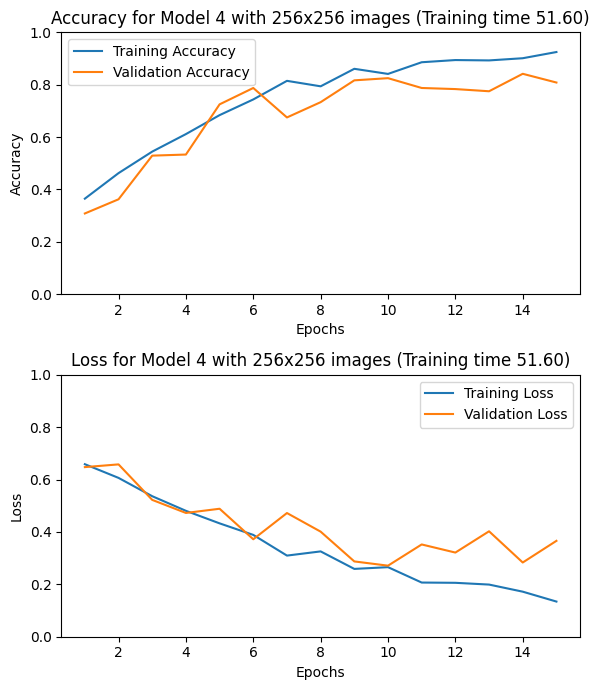

In [ ]:
train_size = train_large
val_size = val_large
shape = 256
model4 = build_conv2d_model(num_layers=4, num_filters=[64, 64, 64, 16], inputshape=(shape, shape, 3))
add_dense_model(model4, num_layers=2, num_neurons=12, num_classes=train_size.num_classes, last_activate='softmax')
model4.summary()
model4, history_s, speed_s = compile_and_fit(model4, train_size, val_size, num_epochs=15, loud=0)
plot_history(history_s, f"Model 4 with {shape}x{shape} images (Training time {speed_s:.2f})")

In [ ]:
data_sets = [(train_small, val_small, 32), (train_med, val_med, 64), (train_large, val_large, 256)]

for train, val, shape in data_sets:
    model3 = (num_layers=3, num_filters=64, inputshape=(shape, shape, 3))
    add_dense_model(model3)
    model3.summary()

    model3, history_s, speed_s = compile_and_fit(model3, train, val, num_epochs=20, loud=0)
    plot_history(history_s, f"Model3 with {shape}x{shape} images")